In [119]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [120]:
test = pd.read_csv('mnist_test.csv', header=None)
train = pd.read_csv('mnist_train.csv', header=None)

/var/folders/fy/xnq7gvy17dg1qvx0z4k6w5_h0000gn/T/ipykernel_6493/2533622602.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,25

In [121]:
train = train.iloc[1:].astype(int)
test = test.iloc[1:].astype(int)
train = train.drop(0, axis=1)
test = test.drop(0, axis=1)
train = train / 255
test = test / 255
print(train.head())

   1    2    3    4    5    6    7    8    9    10   ...  775  776  777  778   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  \
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

   779  780  781  782  783  784  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  
5  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 784 columns]


In [ ]:
# import numpy as np

# # Calculate the number of rows to add noise to
# num_rows = int(0.5 * len(train))

# # Generate random row indices to add noise to
# noise_indices = np.random.choice(len(train), num_rows, replace=False)

# # Add noise to the selected rows
# train.iloc[noise_indices] += np.random.normal(0, 8, size=train.shape[1])



In [122]:
import matplotlib.pyplot as plt
def visualize_digit(dataset, index):
    digit = dataset[index].reshape(28, 28)
    plt.imshow(digit, cmap='gray')
    plt.axis('off')
    plt.show()

def visualize_digit_from_1D(dataset):
    digit = dataset.reshape(28, 28)
    plt.imshow(digit, cmap='gray')
    plt.axis('off')
    plt.show()

# PCA

In [ ]:
def PCA(X,dim):

  cov = np.cov(X.T)

  eigenvalues, eigenvectors  = np.linalg.eig(cov)
  eigenvectors = eigenvectors.T

  inds = np.argsort(eigenvalues)[::-1]
  eigenvalues_sorted = eigenvalues[inds]
  eigenvectors = eigenvectors[inds]

  components = eigenvectors[:dim]
  X_transformed = np.dot(X, components.T)

  return X_transformed, components.T

Reduced dimensions:  2
MSE:  0.09035717682903309


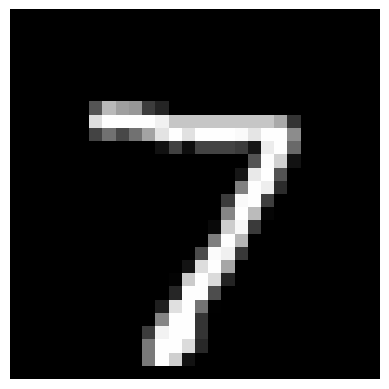

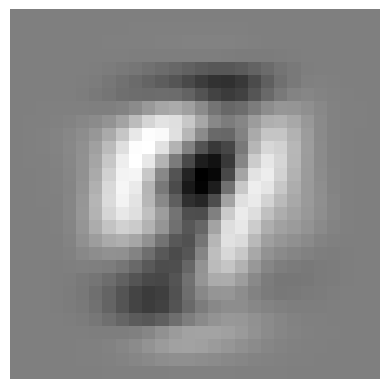

Reduced dimensions:  4
MSE:  0.07757722474647646


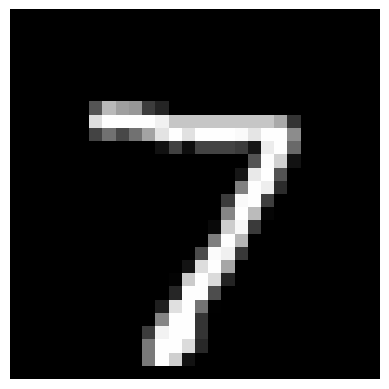

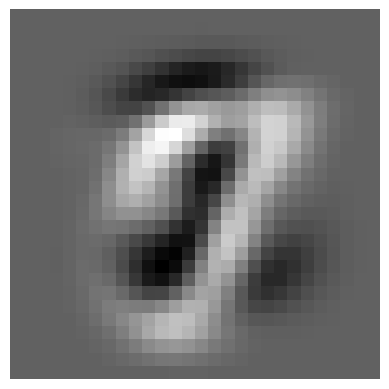

Reduced dimensions:  8
MSE:  0.04388243913666021


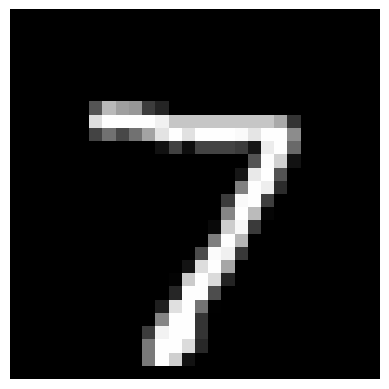

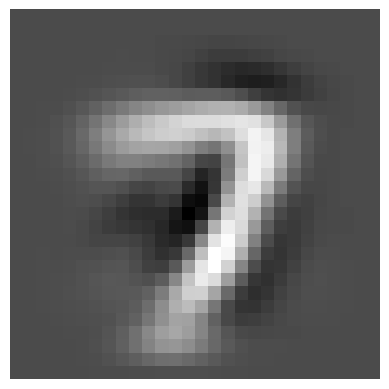

Reduced dimensions:  16
MSE:  0.028337389688390897


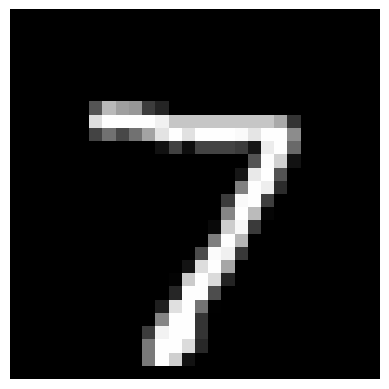

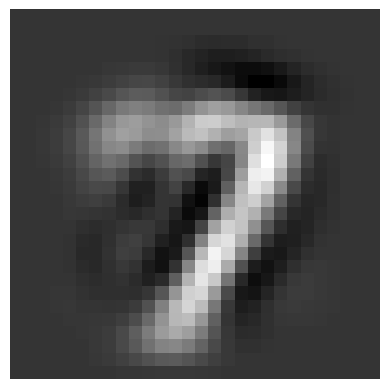

Reduced dimensions:  32
MSE:  0.017158853934173903


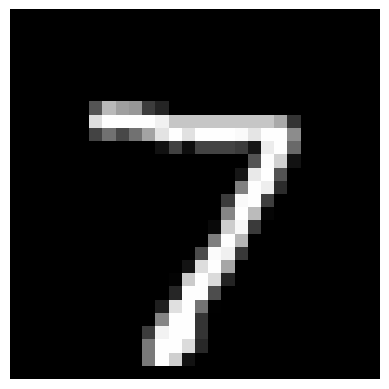

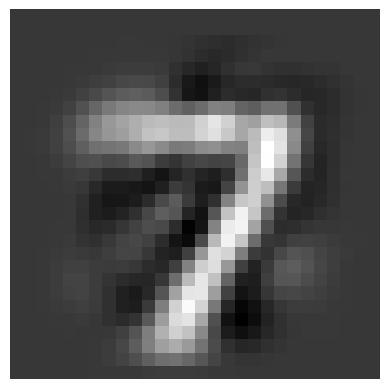

Reduced dimensions:  64
MSE:  0.009156166135083247


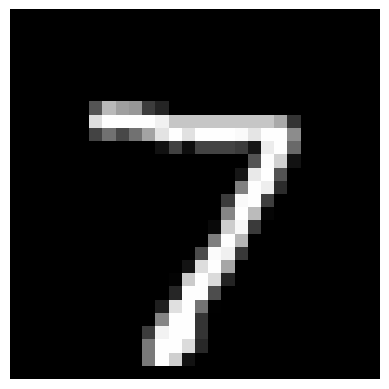

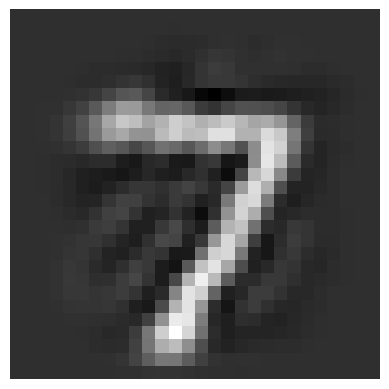

In [123]:
rd = 2
mse_pca = []
while(rd <= 64):
    Xtr,eig=PCA(train,rd)

    reconstructed = np.dot(Xtr, eig.T)
    Xtestr = np.dot(test, eig)
    reconstructed_test = np.dot(Xtestr, eig.T)

    mse = 0
    for i in range(len(test)):
        mse += np.mean((test.values[i] - reconstructed_test[i])**2)

    print("Reduced dimensions: ", rd)
    mse = mse/len(test)
    print("MSE: ", np.real(mse))
    mse_pca.append(np.real(mse))
    visualize_digit(test.values, 0)
    visualize_digit(np.real(reconstructed_test), 0)

    rd = rd*2

Reconstructed images for dimension:  2


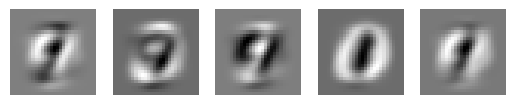

Reconstructed images for dimension:  4


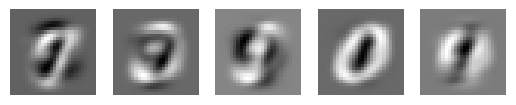

Reconstructed images for dimension:  8


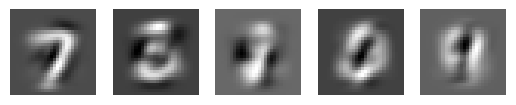

Reconstructed images for dimension:  16


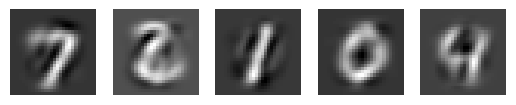

Reconstructed images for dimension:  32


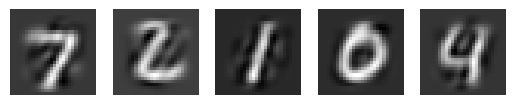

Reconstructed images for dimension:  64


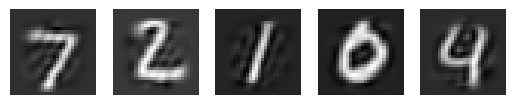

In [139]:
import matplotlib.pyplot as plt

dimensions = [2, 4, 8, 16, 32, 64]

# Iterate over each dimension
for dim in dimensions:
    Xtr, eig = PCA(train, dim)
    Xtestr = np.dot(test, eig)
    reconstructed_test = np.dot(Xtestr, eig.T)
    # Plot the reconstructed images in one row
    fig, axs = plt.subplots(1, 5)
    print("Reconstructed images for dimension: ", dim)
    for i in range(5):
        axs[i].imshow(reconstructed_test[i].reshape(28, 28), cmap='gray')
        axs[i].axis('off')
    plt.show()


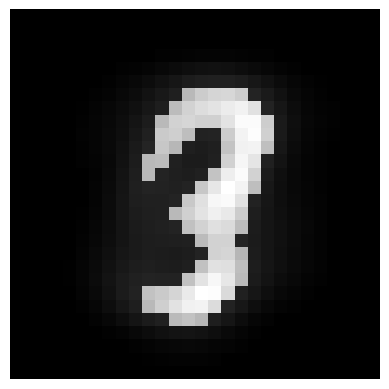

In [ ]:


# mean = 0
# std_dev = 1
# random_value = np.random.normal(mean, std_dev)
# random_array = np.full(rd, random_value)


# mean_image = np.mean(train, axis=0)

# coefficients = np.random.normal(0, 1, size=(rd,))
# generated_image = mean_image*0.7 + ((np.dot(coefficients, eig.T)))*mean_image.mean()*1.2

# threshold = mean_image.mean()*2.2


# generated_image[generated_image > threshold] = generated_image * 5
# generated_image[generated_image <= mean_image.mean()*0.1] = 0

# visualize_digit_from_1D(np.real(generated_image))

# Probabilistic PCA

In [125]:
mu = np.mean(train, axis=0)
print(mu.size)

784


In [126]:
def PPCA(X,dim):

  cov = np.cov(X.T)

  eigenvalues, eigenvectors  = np.linalg.eig(cov)
  eigenvectors = eigenvectors.T

  inds = np.argsort(eigenvalues)[::-1]
  eigenvalues_sorted = eigenvalues[inds]
  eigenvectors = eigenvectors[inds]
  eigenvalues_sorted_d = eigenvalues_sorted[:dim]
  components = eigenvectors[:dim]
  X_transformed = np.dot(X, components.T)
  lamsum = np.sum(eigenvalues_sorted[dim:])
  sigma_sq = lamsum / (X.shape[1] - dim)
  return eigenvalues_sorted_d, sigma_sq, X_transformed, components.T



No. of reduced dimensions:  2


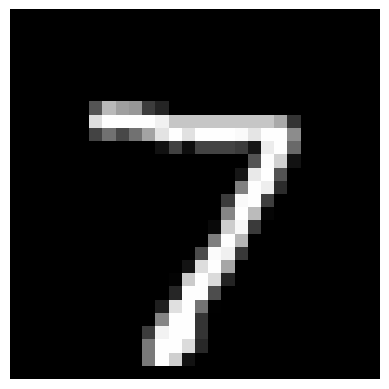

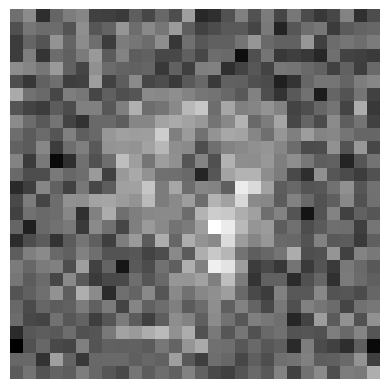

line:  0 MSE:  0.09980028877341574
line:  1000 MSE:  110.61120818108894
line:  2000 MSE:  220.45045585094815
line:  3000 MSE:  330.64658927118876
line:  4000 MSE:  441.35337288347233
line:  5000 MSE:  551.468568898628
line:  6000 MSE:  663.5317929732715
line:  7000 MSE:  776.8270347711241
line:  8000 MSE:  890.6615692770729
line:  9000 MSE:  1005.6749935054803
MSE:  0.11194309312582905
No. of reduced dimensions:  4


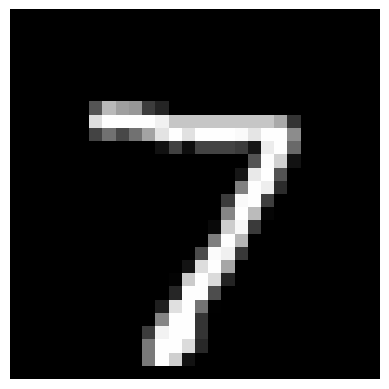

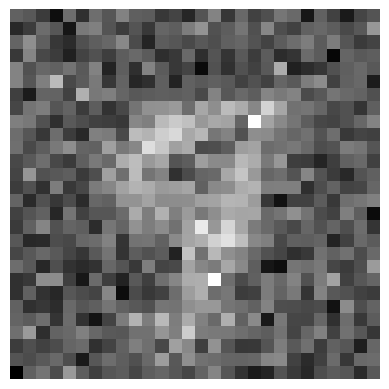

line:  0 MSE:  0.09427963977913006
line:  1000 MSE:  96.07596288846716
line:  2000 MSE:  191.2442380326677
line:  3000 MSE:  286.9585846488759
line:  4000 MSE:  383.12013436060835
line:  5000 MSE:  479.03250261332164
line:  6000 MSE:  575.5130253480125
line:  7000 MSE:  672.5715653146085
line:  8000 MSE:  769.7514282067839
line:  9000 MSE:  868.2557750172011
MSE:  0.0966198104487963
No. of reduced dimensions:  8


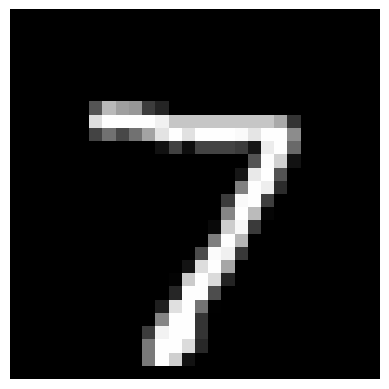

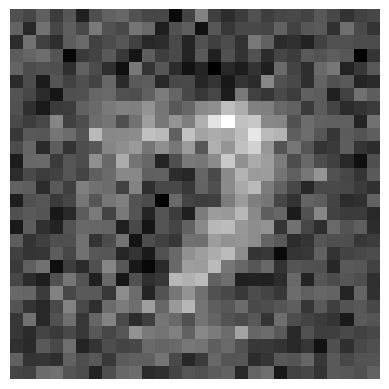

line:  0 MSE:  0.07064109952917721
line:  1000 MSE:  76.07803116119213
line:  2000 MSE:  152.07963133338018
line:  3000 MSE:  228.23143781151404
line:  4000 MSE:  304.72695584479186
line:  5000 MSE:  380.79877308461454


KeyboardInterrupt: 

In [127]:
rd = 2
mse_ppca = []
while(rd <= 64):
    mse = 0
    eivals, sigma_sq, Xtr,eig = PPCA(train,rd)
    Lm = eivals * np.eye(rd)
    Wml = eig @ np.sqrt(Lm - (sigma_sq * np.eye(rd)))
    print("No. of reduced dimensions: ", rd)
    for i in range(len(test)):
        M = np.dot(Wml.T, Wml) + (sigma_sq * np.eye(Wml.shape[1]))
        mean_pzx = np.linalg.inv(M) @ Wml.T @ (test.iloc[i] - mu)
        if np.iscomplexobj(mean_pzx):
            mean_pzx = np.real(mean_pzx)
        samples = np.random.multivariate_normal(mean_pzx, sigma_sq*np.linalg.inv(M), size=1)
        mean_pxz = Wml @ samples[0] + mu
        if np.iscomplexobj(mean_pxz):
            mean_pxz = np.real(mean_pxz)
        samplesx = np.random.multivariate_normal(mean_pxz, sigma_sq*np.eye(train.shape[1]), size=1)
        mse += np.mean((test.values[i] - samplesx[0])**2)
        if(i == 0):
            visualize_digit_from_1D(np.array(test.iloc[i]))
            visualize_digit_from_1D(samplesx[0])
        if(i%1000 == 0):
            print("line: ", i, "MSE: ", np.real(mse))
    mse = mse/len(test)
    print("MSE: ", np.real(mse))
    mse_ppca.append(mse)
    rd = rd*2

No. of reduced dimensions:  2


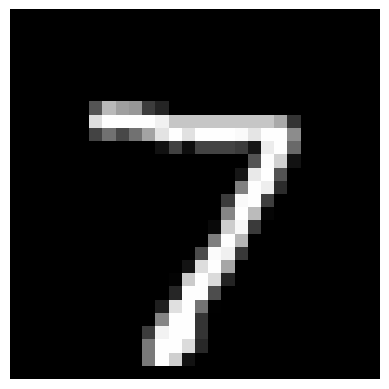

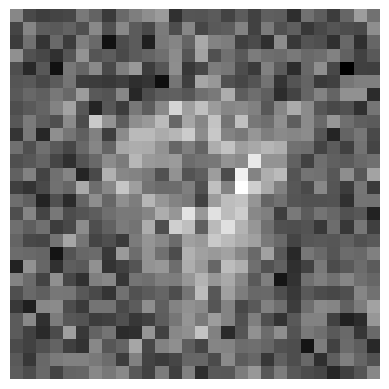

line:  0 MSE:  0.1003702422076674
line:  1 MSE:  0.23242349289904035
line:  2 MSE:  0.31172450573310223
line:  3 MSE:  0.41458516286522246
line:  4 MSE:  0.5241039142285899
line:  5 MSE:  0.5983480603965041
line:  6 MSE:  0.7034738962413859
line:  7 MSE:  0.8182921615084368
line:  8 MSE:  0.9529227523111358
line:  9 MSE:  1.067374112370363
line:  10 MSE:  1.179973955988388
line:  11 MSE:  1.3019869236596895
line:  12 MSE:  1.397602592643456
line:  13 MSE:  1.5102326583402965
line:  14 MSE:  1.5932184616430975
line:  15 MSE:  1.7163725243388377
line:  16 MSE:  1.810671724508963
line:  17 MSE:  1.9244468357026498
line:  18 MSE:  2.088376193327523
line:  19 MSE:  2.1762342373193078
line:  20 MSE:  2.2844629655708317
line:  21 MSE:  2.3997180585494897
line:  22 MSE:  2.517664186055772
line:  23 MSE:  2.6256166321758405
line:  24 MSE:  2.7282611737925766
line:  25 MSE:  2.8341509529151585
line:  26 MSE:  2.9314023574424684
line:  27 MSE:  3.0319339447319242
line:  28 MSE:  3.136064879931974

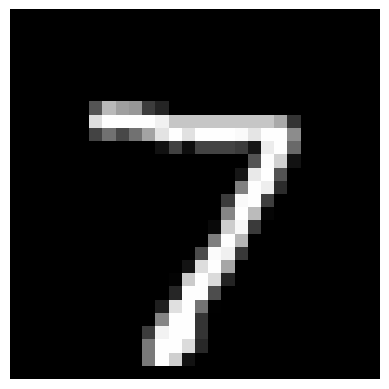

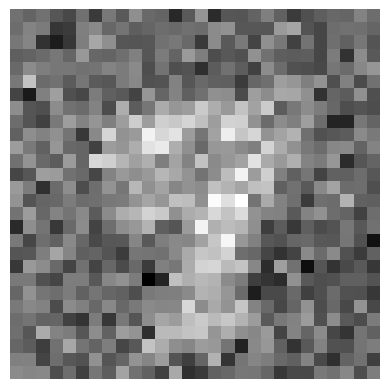

line:  0 MSE:  0.08177234110308752
line:  1 MSE:  0.1989683922700288
line:  2 MSE:  0.2668211081553098
line:  3 MSE:  0.36300067623082416
line:  4 MSE:  0.4488868205705461
line:  5 MSE:  0.5163590945270541
line:  6 MSE:  0.6202102192764023
line:  7 MSE:  0.7227616059153552
line:  8 MSE:  0.8426039831084683
line:  9 MSE:  0.9371560960642656
line:  10 MSE:  1.0395956977068237
line:  11 MSE:  1.1547742905107221
line:  12 MSE:  1.2318047997889645
line:  13 MSE:  1.3306662685782829
line:  14 MSE:  1.4139065341428005
line:  15 MSE:  1.5186052636572973
line:  16 MSE:  1.6033530952671033
line:  17 MSE:  1.708141737137575
line:  18 MSE:  1.844083569265126
line:  19 MSE:  1.9300921514336289
line:  20 MSE:  2.0143502293820688
line:  21 MSE:  2.1149461264966014
line:  22 MSE:  2.2097210512204164
line:  23 MSE:  2.3063990626111344
line:  24 MSE:  2.3898571897822514
line:  25 MSE:  2.493307485694006
line:  26 MSE:  2.586969926970887
line:  27 MSE:  2.6720369546897014
line:  28 MSE:  2.76491071489608

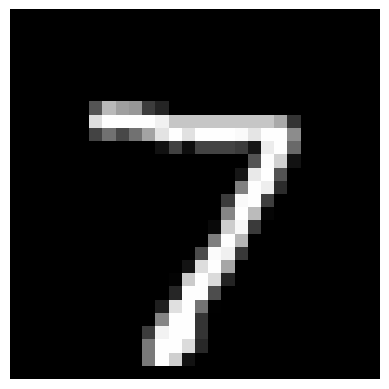

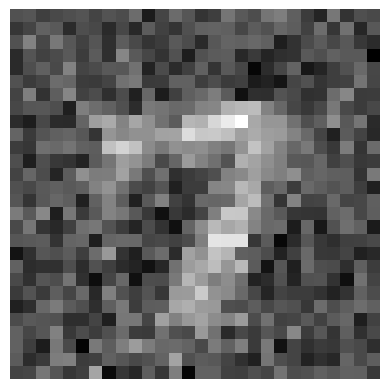

line:  0 MSE:  0.06985652263295859
line:  1 MSE:  0.1734129377575996
line:  2 MSE:  0.22569349587088047
line:  3 MSE:  0.2970654076728976
line:  4 MSE:  0.3669464763463697
line:  5 MSE:  0.4185141529693561
line:  6 MSE:  0.503762237597145
line:  7 MSE:  0.582851709966206
line:  8 MSE:  0.6940582276006728
line:  9 MSE:  0.7762407600551355
line:  10 MSE:  0.844047663121189
line:  11 MSE:  0.9427657351917285
line:  12 MSE:  1.0072952883590982
line:  13 MSE:  1.0832564743761552
line:  14 MSE:  1.1397280109580306
line:  15 MSE:  1.231583812480888
line:  16 MSE:  1.3016653152397202
line:  17 MSE:  1.3803898579779332
line:  18 MSE:  1.5081488428114906
line:  19 MSE:  1.564664817131543
line:  20 MSE:  1.6328027628501103
line:  21 MSE:  1.704148444212324
line:  22 MSE:  1.792203685292034
line:  23 MSE:  1.8717801093082351
line:  24 MSE:  1.9355095111403273
line:  25 MSE:  2.0107102323352493
line:  26 MSE:  2.083889820061222
line:  27 MSE:  2.150912148705401
line:  28 MSE:  2.2352490072023983
li

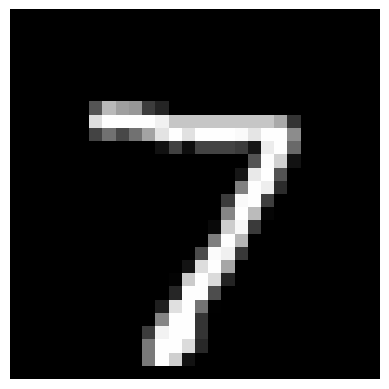

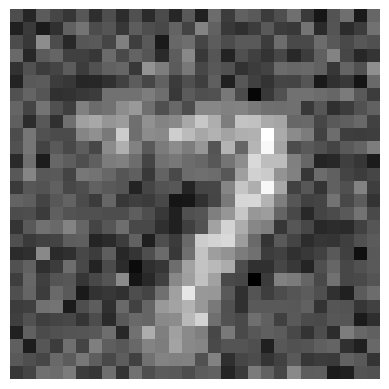

line:  0 MSE:  0.04823593151191812
line:  1 MSE:  0.11569211009043903
line:  2 MSE:  0.1533725057313471
line:  3 MSE:  0.20089456998579264
line:  4 MSE:  0.25085119949472523
line:  5 MSE:  0.2859311943577869
line:  6 MSE:  0.34130184599785407
line:  7 MSE:  0.4061626388051417
line:  8 MSE:  0.4766999025004997
line:  9 MSE:  0.5278218621241595
line:  10 MSE:  0.5764942781311142
line:  11 MSE:  0.644622618809072
line:  12 MSE:  0.6930668743960292
line:  13 MSE:  0.7495510209284449
line:  14 MSE:  0.7865969528723374
line:  15 MSE:  0.8544682304923789
line:  16 MSE:  0.9049103675809252
line:  17 MSE:  0.9579947470629677
line:  18 MSE:  1.0392272162359786
line:  19 MSE:  1.0800497677901062
line:  20 MSE:  1.1223290241496287
line:  21 MSE:  1.1761451524011348
line:  22 MSE:  1.2436633653057398
line:  23 MSE:  1.2988223240520371
line:  24 MSE:  1.347600672513231
line:  25 MSE:  1.401411196608233
line:  26 MSE:  1.447938897514967
line:  27 MSE:  1.4988174227671442
line:  28 MSE:  1.54734142951

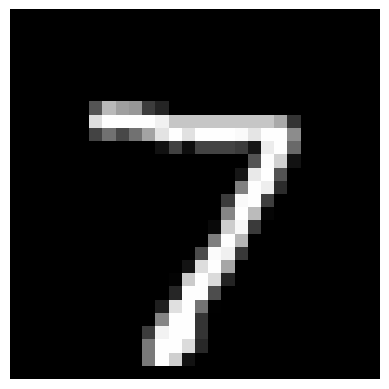

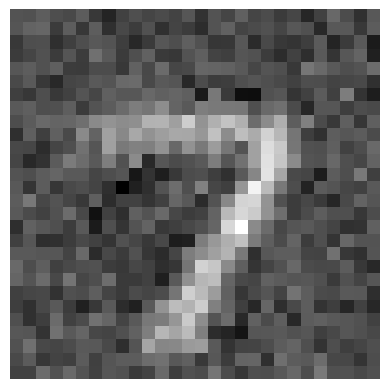

line:  0 MSE:  0.03143612943724914
line:  1 MSE:  0.07458434511002808
line:  2 MSE:  0.10013694081798566
line:  3 MSE:  0.13478506199681597
line:  4 MSE:  0.16538744328382368
line:  5 MSE:  0.18928700184161207
line:  6 MSE:  0.2246349870871837
line:  7 MSE:  0.2689255010439881
line:  8 MSE:  0.31171151345928866
line:  9 MSE:  0.3464367248081644
line:  10 MSE:  0.3809354400928388
line:  11 MSE:  0.42825709051501293
line:  12 MSE:  0.45579645971875726
line:  13 MSE:  0.48722201665838377
line:  14 MSE:  0.5121663686430561
line:  15 MSE:  0.5578208563924214
line:  16 MSE:  0.5898922240783803
line:  17 MSE:  0.6257745722496392
line:  18 MSE:  0.6812983032887329
line:  19 MSE:  0.7133676726805974
line:  20 MSE:  0.7411503253714938
line:  21 MSE:  0.7732545996871578
line:  22 MSE:  0.8124772820816606
line:  23 MSE:  0.8481192871283222
line:  24 MSE:  0.882989913940432
line:  25 MSE:  0.9219780388865234
line:  26 MSE:  0.9583745488117299
line:  27 MSE:  0.9919966517713943
line:  28 MSE:  1.021

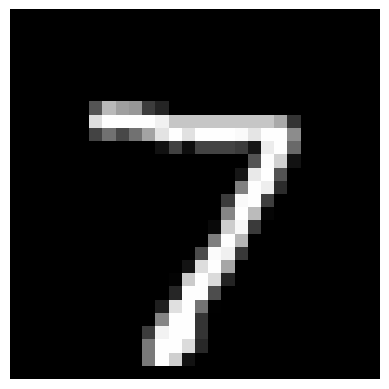

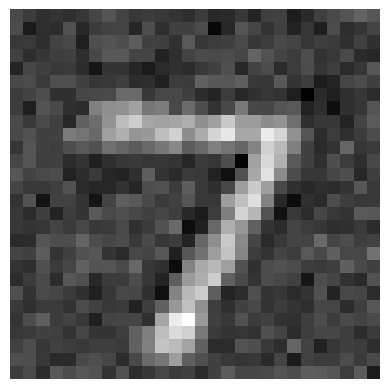

line:  0 MSE:  0.018048119418917312
line:  1 MSE:  0.04230059685185661
line:  2 MSE:  0.05750565932294515
line:  3 MSE:  0.07556560801595658
line:  4 MSE:  0.09571800062127112
line:  5 MSE:  0.10913962885530008
line:  6 MSE:  0.12849607199983534
line:  7 MSE:  0.15141961576784696
line:  8 MSE:  0.17491266292074784
line:  9 MSE:  0.1930270893787799
line:  10 MSE:  0.2118396562351724
line:  11 MSE:  0.23590280519895557
line:  12 MSE:  0.2526384843226157
line:  13 MSE:  0.2699452382715483
line:  14 MSE:  0.2859054340319742
line:  15 MSE:  0.30948397367670827
line:  16 MSE:  0.32913094937164344
line:  17 MSE:  0.3476767252471533
line:  18 MSE:  0.3759190220599478
line:  19 MSE:  0.39357534366948804
line:  20 MSE:  0.41020723339632853
line:  21 MSE:  0.4301145725541895
line:  22 MSE:  0.45661719509036464
line:  23 MSE:  0.4768660433773429
line:  24 MSE:  0.4973041094429676
line:  25 MSE:  0.519720357736285
line:  26 MSE:  0.5424170537218961
line:  27 MSE:  0.5599046714188115
line:  28 MSE: 

In [130]:
rd = 2
mse_ppca = []
while(rd <= 64):
    mse = 0
    eivals, sigma_sq, Xtr,eig = PPCA(train,rd)
    Lm = eivals * np.eye(rd)
    Wml = eig @ np.sqrt(Lm - (sigma_sq * np.eye(rd)))
    print("No. of reduced dimensions: ", rd)
    for i in range(100):
        M = np.dot(Wml.T, Wml) + (sigma_sq * np.eye(Wml.shape[1]))
        mean_pzx = np.linalg.inv(M) @ Wml.T @ (test.iloc[i] - mu)
        if np.iscomplexobj(mean_pzx):
            mean_pzx = np.real(mean_pzx)
        samples = np.random.multivariate_normal(mean_pzx, sigma_sq*np.linalg.inv(M), size=1)
        mean_pxz = Wml @ samples[0] + mu
        if np.iscomplexobj(mean_pxz):
            mean_pxz = np.real(mean_pxz)
        samplesx = np.random.multivariate_normal(mean_pxz, sigma_sq*np.eye(train.shape[1]), size=1)
        mse += np.mean((test.values[i] - samplesx[0])**2)
        if(i == 0):
            visualize_digit_from_1D(np.array(test.iloc[i]))
            visualize_digit_from_1D(samplesx[0])
        print("line: ", i, "MSE: ", np.real(mse))
    mse = mse/100
    print("MSE: ", np.real(mse))
    mse_ppca.append(mse)
    rd = rd*2

In [133]:
print(mse_ppca)
print(mse_pca)

[0.10996395373405772, 0.09620197656253555, 0.07647706886509247, 0.05442414066017629, 0.03538122107436013, 0.02017924272594421]
[0.09035717682903309, 0.07757722474647646, 0.04388243913666021, 0.028337389688390897, 0.017158853934173903, 0.009156166135083247]


Reconstructed images for dimension:  2


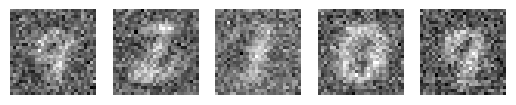

Reconstructed images for dimension:  4


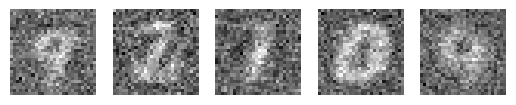

Reconstructed images for dimension:  8


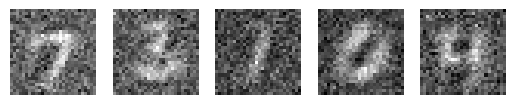

Reconstructed images for dimension:  16


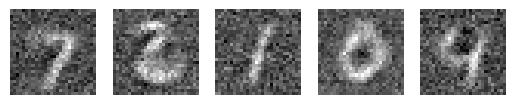

Reconstructed images for dimension:  32


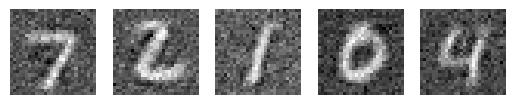

Reconstructed images for dimension:  64


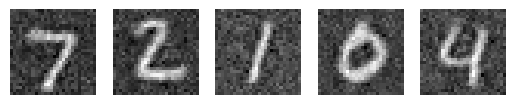

In [142]:
import matplotlib.pyplot as plt

dimensions = [2, 4, 8, 16, 32, 64]

# Iterate over each dimension
for dim in dimensions:
    rd = dim
    eivals, sigma_sq, Xtr,eig = PPCA(train,rd)
    Lm = eivals * np.eye(rd)
    Wml = eig @ np.sqrt(Lm - (sigma_sq * np.eye(rd)))
    Xtestr = np.dot(test, eig)
    reconstructed_test = np.dot(Xtestr, eig.T)
    # Plot the reconstructed images in one row
    fig, axs = plt.subplots(1, 5)
    print("Reconstructed images for dimension: ", dim)
    for i in range(5):
        M = np.dot(Wml.T, Wml) + (sigma_sq * np.eye(Wml.shape[1]))
        mean_pzx = np.linalg.inv(M) @ Wml.T @ (test.iloc[i] - mu)
        if np.iscomplexobj(mean_pzx):
            mean_pzx = np.real(mean_pzx)
        samples = np.random.multivariate_normal(mean_pzx, sigma_sq*np.linalg.inv(M), size=1)
        mean_pxz = Wml @ samples[0] + mu
        if np.iscomplexobj(mean_pxz):
            mean_pxz = np.real(mean_pxz)
        samplesx = np.random.multivariate_normal(mean_pxz, sigma_sq*np.eye(train.shape[1]), size=1)
        mse += np.mean((test.values[i] - samplesx[0])**2)
        axs[i].imshow(samplesx[0].reshape(28, 28), cmap='gray')
        axs[i].axis('off')
    plt.show()

# mse = 0
# eivals, sigma_sq, Xtr,eig = PPCA(train,rd)
# Lm = eivals * np.eye(rd)
# Wml = eig @ np.sqrt(Lm - (sigma_sq * np.eye(rd)))
# print("No. of reduced dimensions: ", rd)
# for i in range(100):
#     M = np.dot(Wml.T, Wml) + (sigma_sq * np.eye(Wml.shape[1]))
#     mean_pzx = np.linalg.inv(M) @ Wml.T @ (test.iloc[i] - mu)
#     if np.iscomplexobj(mean_pzx):
#         mean_pzx = np.real(mean_pzx)
#     samples = np.random.multivariate_normal(mean_pzx, sigma_sq*np.linalg.inv(M), size=1)
#     mean_pxz = Wml @ samples[0] + mu
#     if np.iscomplexobj(mean_pxz):
#         mean_pxz = np.real(mean_pxz)
#     samplesx = np.random.multivariate_normal(mean_pxz, sigma_sq*np.eye(train.shape[1]), size=1)
#     mse += np.mean((test.values[i] - samplesx[0])**2)
#     if(i == 0):
#         visualize_digit_from_1D(np.array(test.iloc[i]))
#         visualize_digit_from_1D(samplesx[0])
#     print("line: ", i, "MSE: ", np.real(mse))
#     mse = mse/100